In [2]:
import pandas as pd
from sklearn import tree #Decision Trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Admission_Chance_Classification.csv')

In [4]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,YES,YES
1,324,107,4,4.0,4.5,8.87,YES,YES
2,316,104,3,3.0,3.5,8.00,YES,YES
3,322,110,3,3.5,2.5,8.67,YES,YES
4,314,103,2,2.0,3.0,8.21,NO,YES


### Q1 and Q2

In [6]:
X = df.drop(['Admit'],axis=1)
Y = df['Admit']

In [7]:
X

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,YES
1,324,107,4,4.0,4.5,8.87,YES
2,316,104,3,3.0,3.5,8.00,YES
3,322,110,3,3.5,2.5,8.67,YES
4,314,103,2,2.0,3.0,8.21,NO
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,YES
396,325,107,3,3.0,3.5,9.11,YES
397,330,116,4,5.0,4.5,9.45,YES
398,312,103,3,3.5,4.0,8.78,NO


In [8]:
Y

0      YES
1      YES
2      YES
3      YES
4      YES
      ... 
395    YES
396    YES
397    YES
398    YES
399    YES
Name: Admit, Length: 400, dtype: object

In [9]:
dt = tree.DecisionTreeClassifier(random_state=99)

In [10]:
X = pd.get_dummies(X, columns = ['Research'], dtype=int)

In [11]:
X

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research_NO,Research_YES
0,337,118,4,4.5,4.5,9.65,0,1
1,324,107,4,4.0,4.5,8.87,0,1
2,316,104,3,3.0,3.5,8.00,0,1
3,322,110,3,3.5,2.5,8.67,0,1
4,314,103,2,2.0,3.0,8.21,1,0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,0,1
396,325,107,3,3.0,3.5,9.11,0,1
397,330,116,4,5.0,4.5,9.45,0,1
398,312,103,3,3.5,4.0,8.78,1,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=99)

In [13]:
X_train.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research_NO,Research_YES
376,297,96,2,2.5,2.0,7.43,1,0
171,334,117,5,4.0,4.5,9.07,0,1
115,310,106,4,4.5,4.5,9.04,0,1
24,336,119,5,4.0,3.5,9.80,0,1
43,332,117,4,4.5,4.0,9.10,1,0


In [14]:
X_train.shape

(280, 8)

In [15]:
y_train.head()

376     NO
171    YES
115    YES
24     YES
43     YES
Name: Admit, dtype: object

In [16]:
dtmodel = dt.fit(X_train, y_train)

In [17]:
train_pred = dtmodel.predict(X_train)

In [18]:
train_pred

array(['NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES',
     

In [19]:
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [20]:
test_pred = dtmodel.predict(X_test)

In [21]:
test_pred

array(['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES'],
      dtype=object)

In [22]:
acc = accuracy_score(test_pred, y_test)
acc*100

89.16666666666667

### Q3

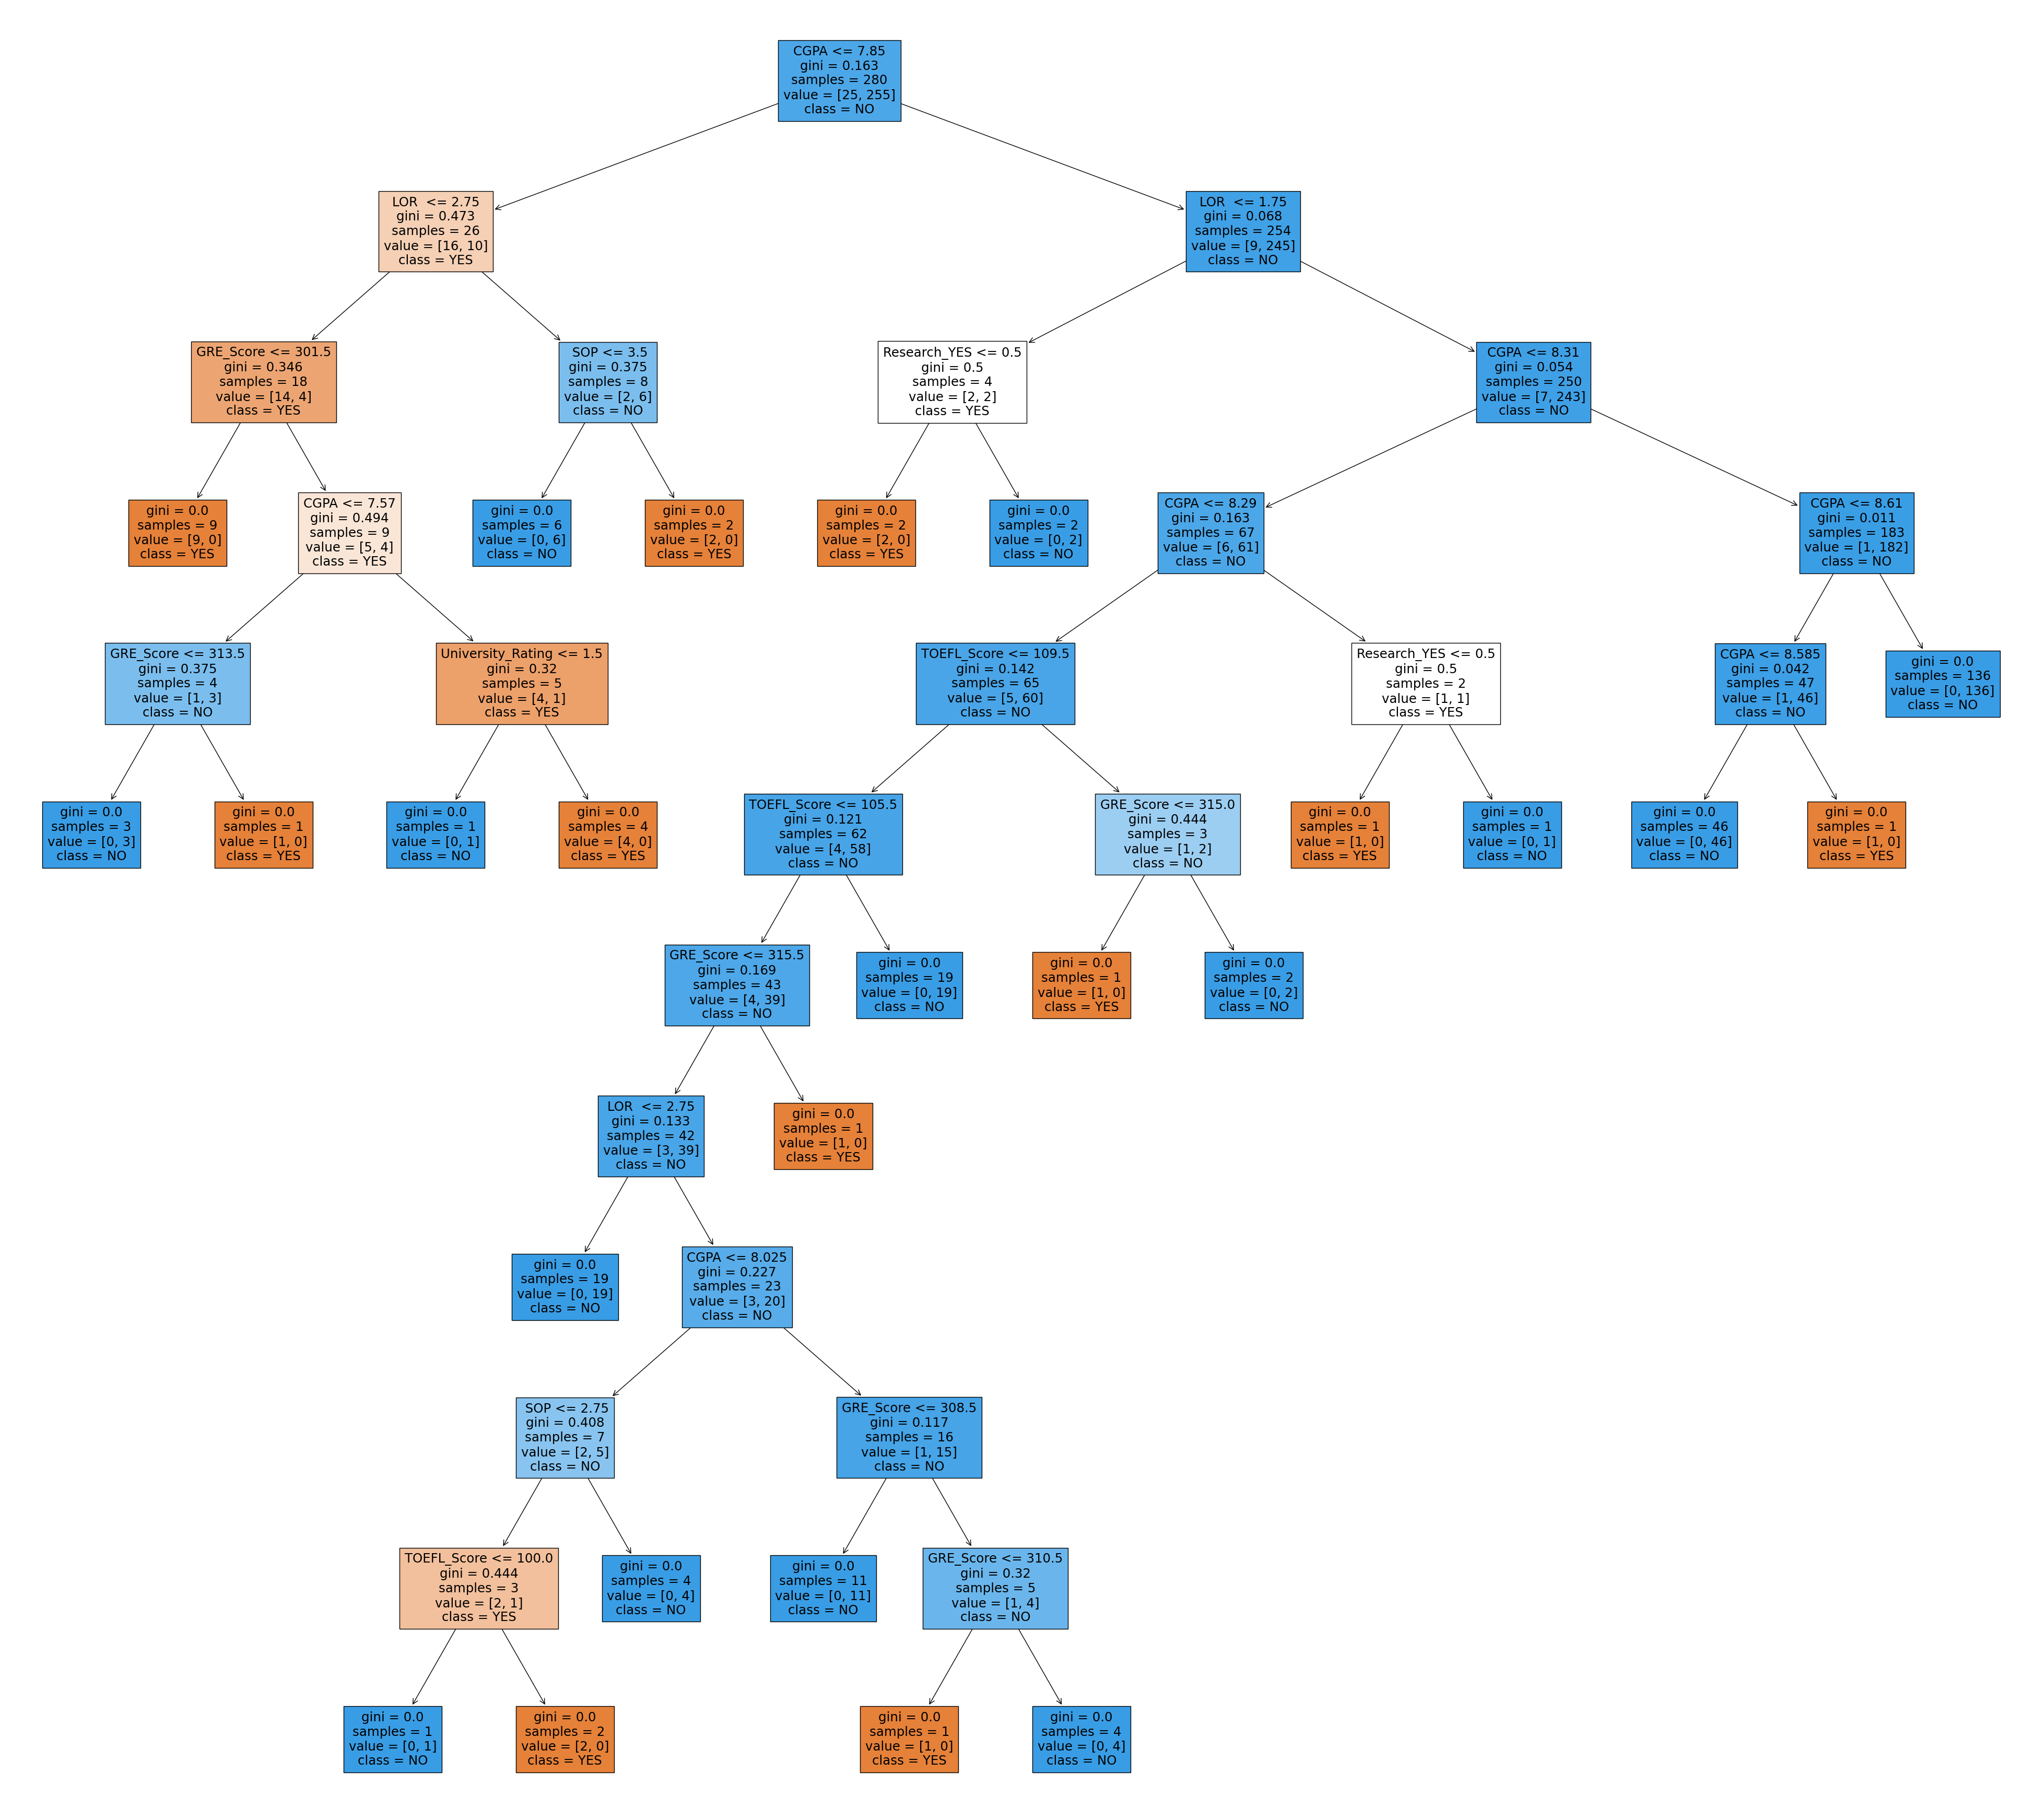

In [24]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel, 
                   feature_names=list(X.columns),  
                   class_names=Y.value_counts().index,
                   filled=True)

In [25]:
fig.savefig("decistion_tree.png")

### Interpretation

#### In the decision tree, CGPA is a very important factor, appearing at the top and in many branches, showing it strongly predicts whether a student gets admitted. GRE Score is also important, showing up multiple times near the top of the tree, which means it has a big impact on predictions. Research and TOEFL Score are used in the middle of the tree, so they  are less crucial. 

### Q4

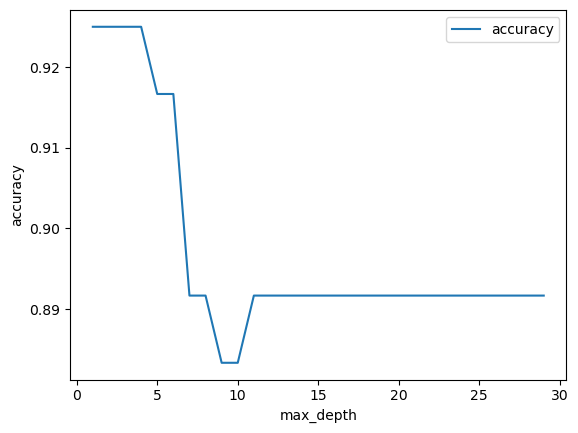

In [29]:
max_depth = []
acc = []
for i in range(1,30):
    dtree = tree.DecisionTreeClassifier(max_depth=i,random_state=100)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc.append(accuracy_score(y_test, pred))
    max_depth.append(i)
    
d = pd.DataFrame({'accuracy':pd.Series(acc),'max_depth':pd.Series(max_depth)})

plt.plot(d['max_depth'].values,d['accuracy'].values)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(["accuracy"])

In [30]:
dt = tree.DecisionTreeClassifier(max_depth=4,random_state=99)

In [31]:
dtmodel = dt.fit(X_train, y_train)
train_pred = dtmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

96.78571428571429

In [32]:
test_pred = dtmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

92.5

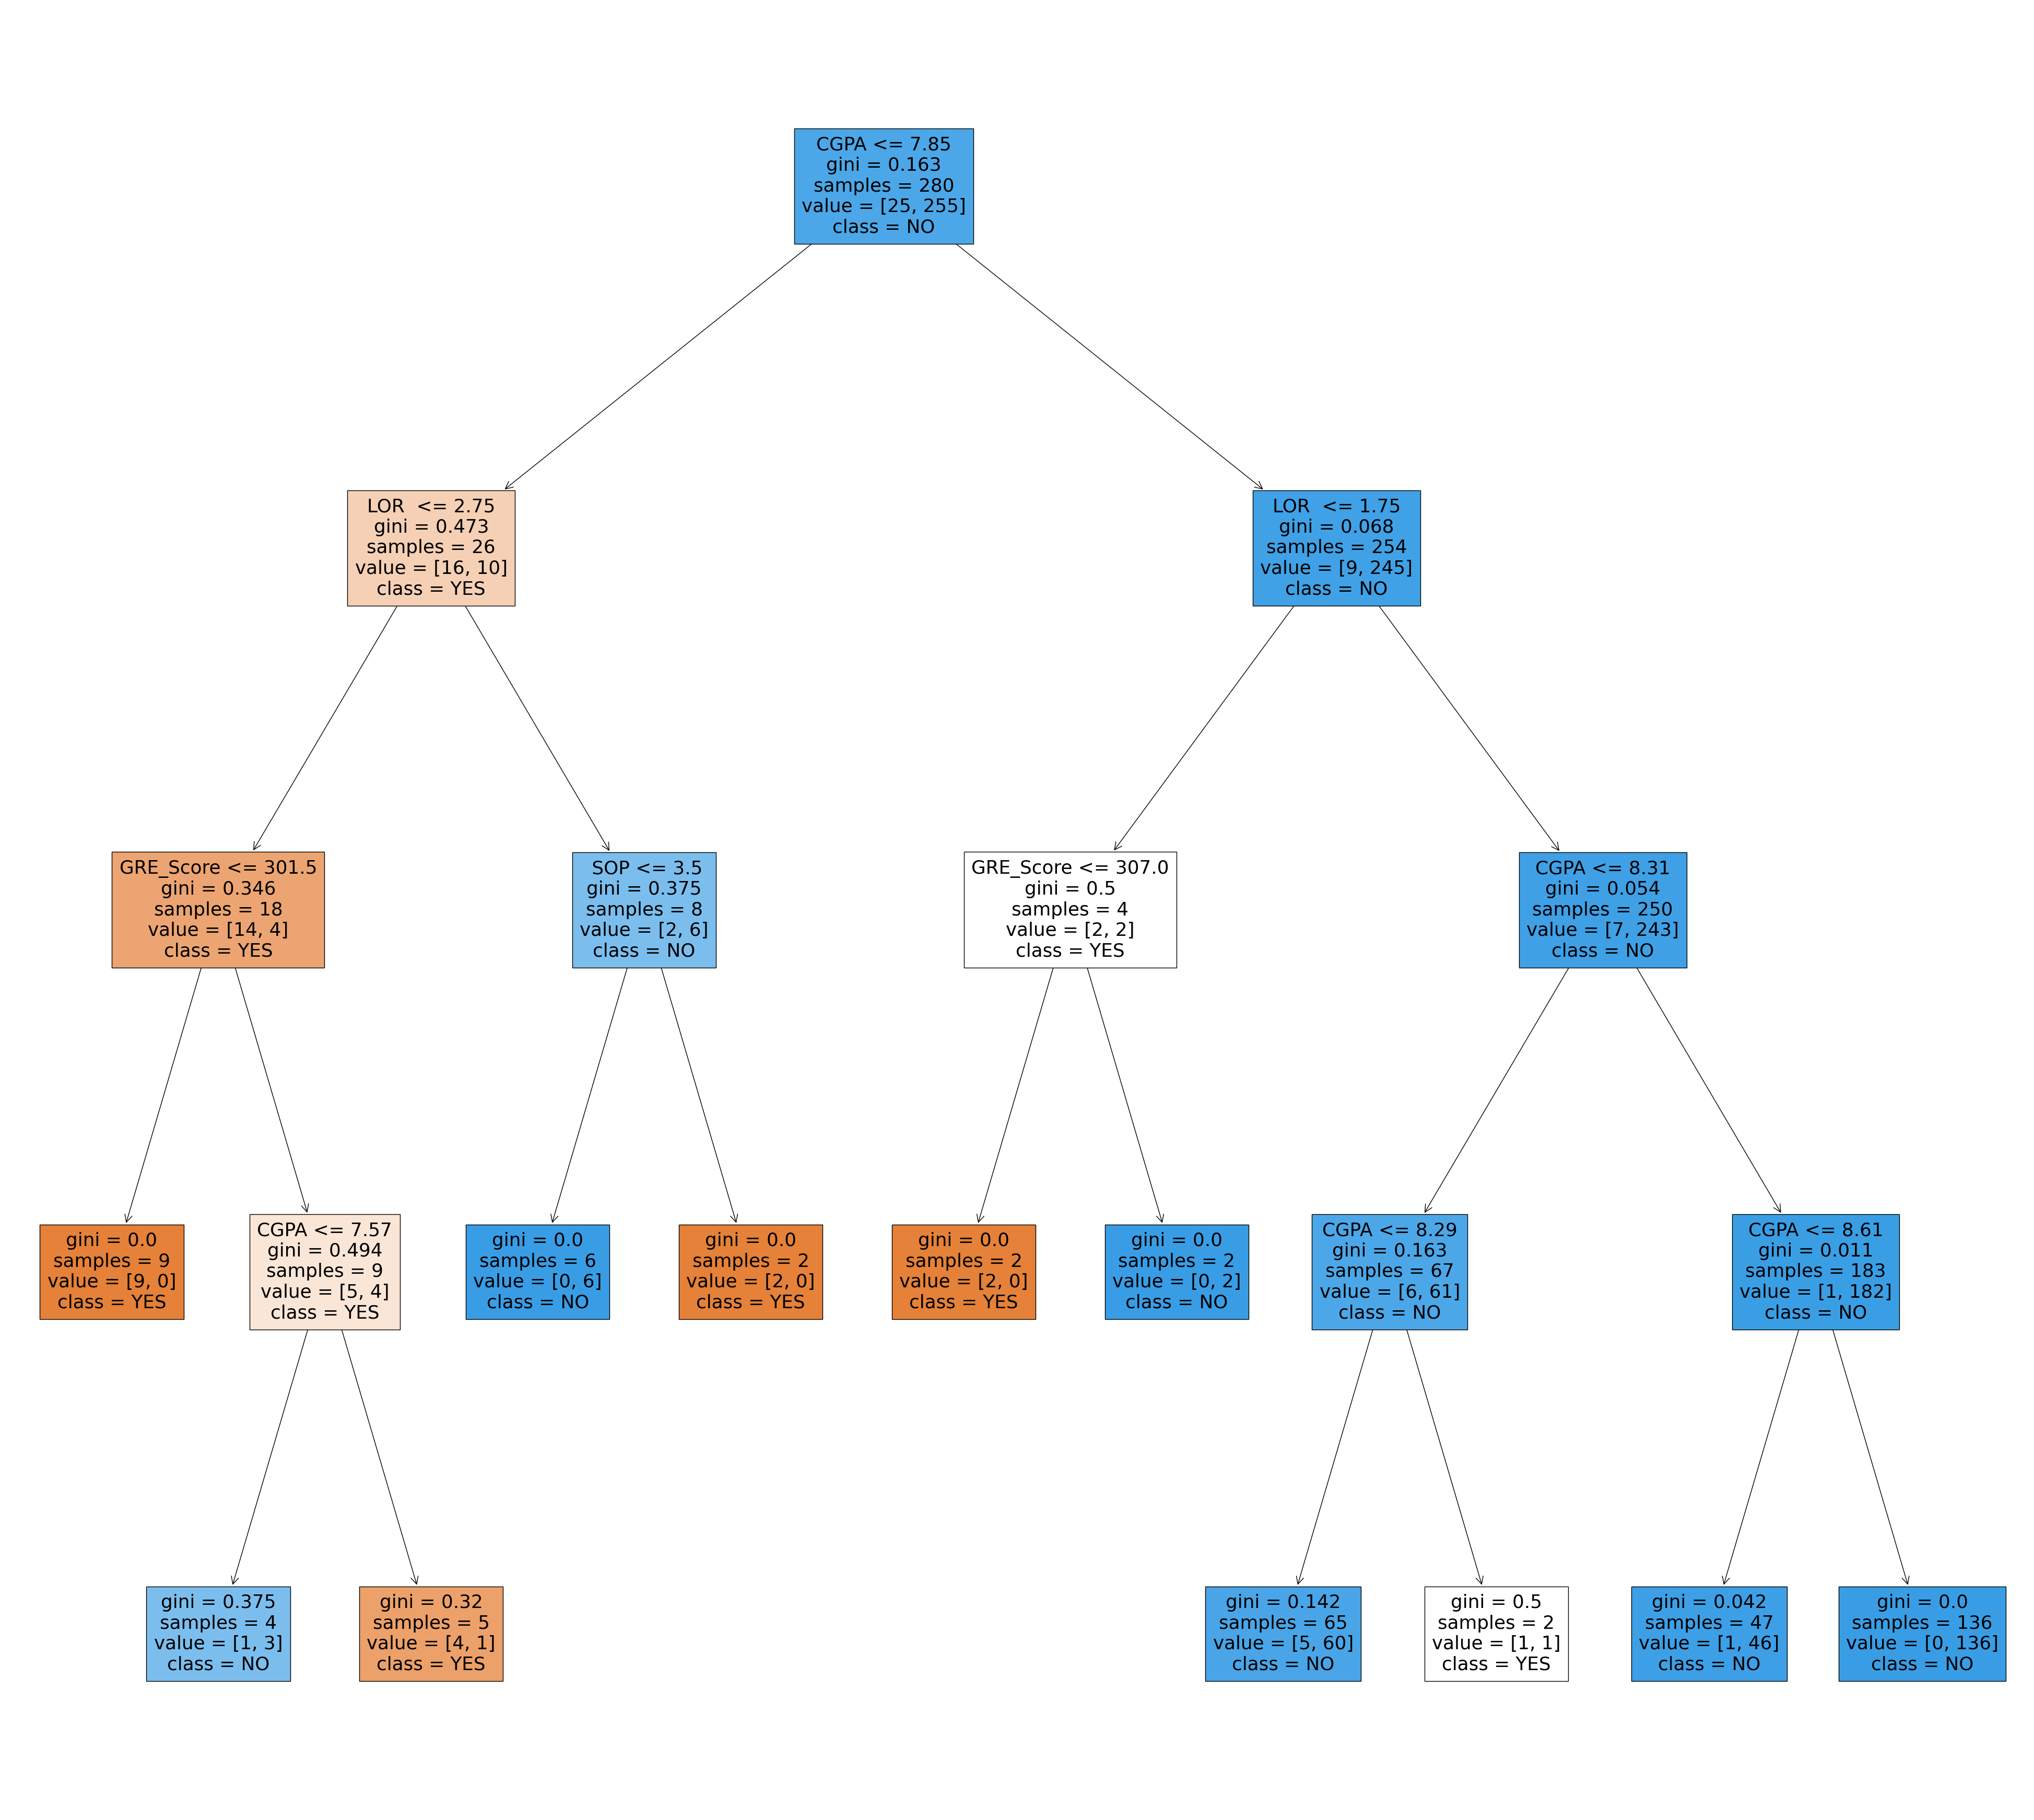

In [33]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel, 
                   feature_names=list(X.columns),  
                   class_names=Y.value_counts().index,
                   filled=True)

In [34]:
fig.savefig("after_pruning.png")

##### 
After pruning, the decision tree is simpler and clearer. The pruning process remodes branches and nodes that don’t add much to its predictive ability, resulting in a more compact and easier-to-read model. Important features, like CGPA and GRE scores, usually stay in the higher levels of the tree, while less relevant featureare removed. This makes the tree easier to interpresTle the pruned tdoesight have a little lower accuracy on the training dabut overfitting is eliminated and ta, it’s expected to do better on new, unseen dails.

### Q5

In [37]:
rf = RandomForestClassifier(n_estimators=10)

In [38]:
rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

99.28571428571429

In [39]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

95.0

Text(0.5, 0, 'Random Forest Feature Importance n = 10')

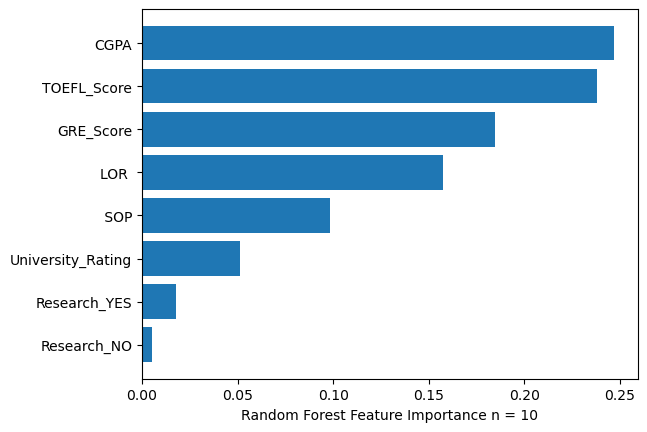

In [40]:
sorted_idx = rfmodel.feature_importances_.argsort()
plt.barh(list(X.columns[sorted_idx]), rfmodel.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance n = 10")

In [41]:
rf = RandomForestClassifier(n_estimators=50)

In [42]:
rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [43]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

94.16666666666667

Text(0.5, 0, 'Random Forest Feature Importance n = 50')

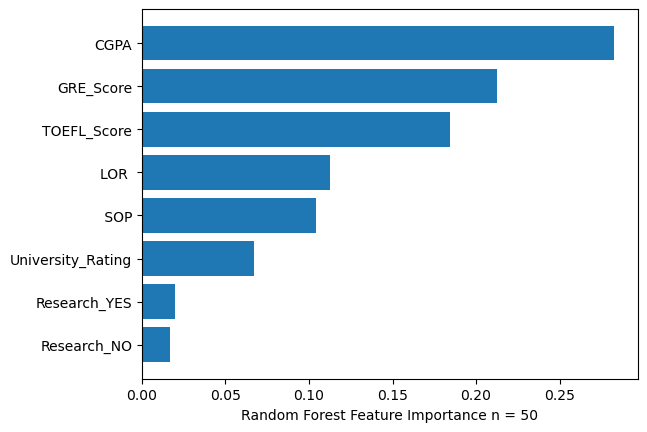

In [44]:
sorted_idx = rfmodel.feature_importances_.argsort()
plt.barh(list(X.columns[sorted_idx]), rfmodel.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance n = 50")

In [45]:
rf = RandomForestClassifier(n_estimators=100)

In [46]:
rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [47]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

95.0

Text(0.5, 0, 'Random Forest Feature Importance n = 100')

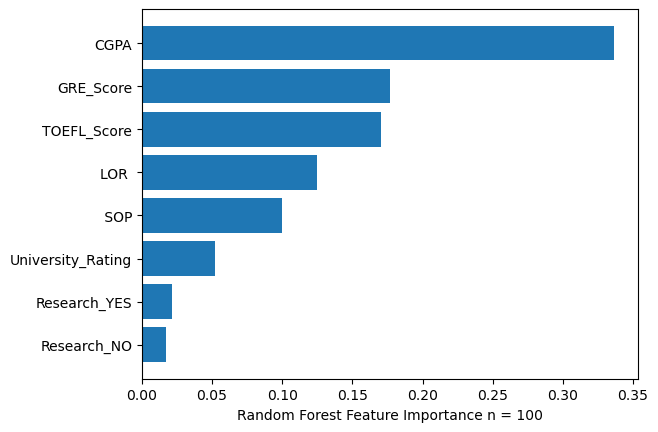

In [48]:
sorted_idx = rfmodel.feature_importances_.argsort()
plt.barh(list(X.columns[sorted_idx]), rfmodel.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance n = 100")

In [49]:
rf = RandomForestClassifier(n_estimators=150)

In [50]:
rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [51]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

95.83333333333334

Text(0.5, 0, 'Random Forest Feature Importance n = 150')

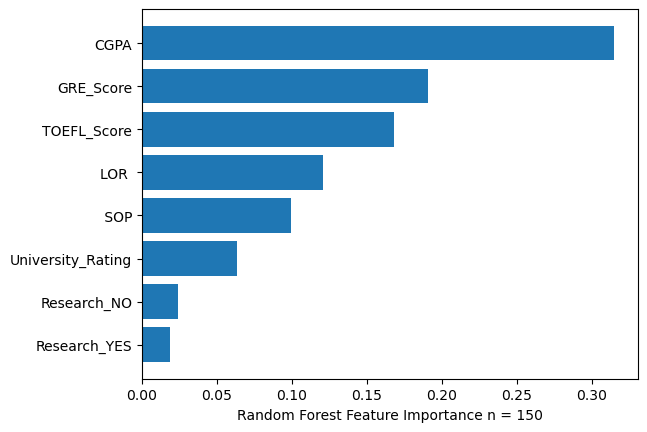

In [52]:
sorted_idx = rfmodel.feature_importances_.argsort()
plt.barh(list(X.columns[sorted_idx]), rfmodel.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance n = 150")

In [53]:
rf = RandomForestClassifier(n_estimators=200)

In [54]:
rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [55]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

95.83333333333334

Text(0.5, 0, 'Random Forest Feature Importance n = 200')

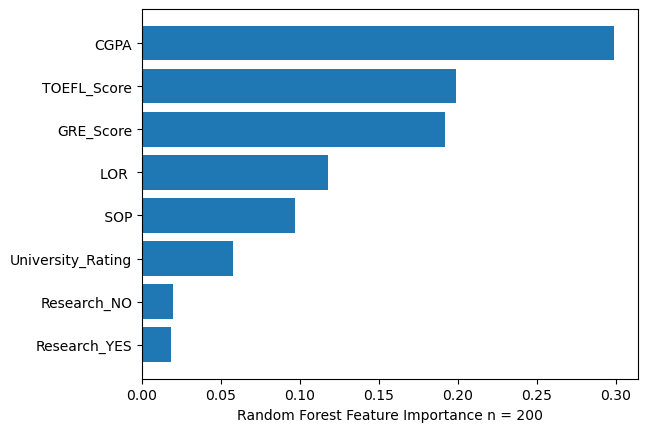

In [56]:
sorted_idx = rfmodel.feature_importances_.argsort()
plt.barh(list(X.columns[sorted_idx]), rfmodel.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance n = 200")

Text(0.5, 0, 'Random Forest Feature Importance')

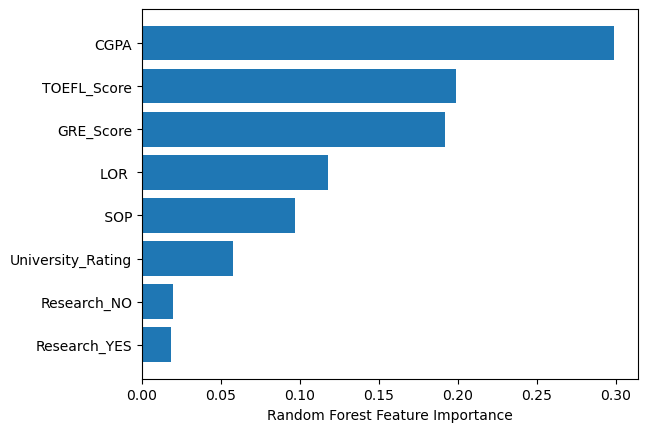

In [57]:
sorted_idx = rfmodel.feature_importances_.argsort()
plt.barh(list(X.columns[sorted_idx]), rfmodel.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### Analysis
##### n = 150 and 200 have the highest accuracy (95.8333..) and hence can be labelled as the best models. n = 50 has the lowest accuracy and n = 10 and n = 100 have the same accuracy. 

### Q6

#### Decision tree had an accuracy of 92 while random forest had an accuracy of 95. Decision tree was easier to interpret while in random forest it was easier to see which individual features have the highest importance. Random forest is better at handling overfitting and iss the preferred option for classification accuracy and reliability.

### Q7

In [60]:
bkdata = pd.read_csv('burger-king-menu-2.csv')

In [61]:
bkdata.head()

,Item,Category,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g)
0,Whopper® Sandwich,Burgers,660,360,40.0,12.0,1.5,90,980,49,2,11,28
1,Whopper® Sandwich with Cheese,Burgers,740,420,46.0,16.0,2.0,115,1340,50,2,11,32
2,Bacon & Cheese Whopper® Sandwich,Burgers,790,460,51.0,17.0,2.0,125,1560,50,2,11,35
3,Double Whopper® Sandwich,Burgers,900,520,58.0,20.0,3.0,175,1050,49,2,11,48
4,Double Whopper® Sandwich with Cheese,Burgers,980,580,64.0,24.0,3.0,195,1410,50,2,11,52


In [62]:
burger_data = bkdata[bkdata['Category'] == 'Burgers']
burger_data = burger_data.drop(columns=['Category']) 

In [63]:
X = burger_data.drop(['Item'],axis=1)  
Y = burger_data['Item']  

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=99)

In [65]:
dt = tree.DecisionTreeClassifier(random_state=99)
dtmodel = dt.fit(X_train, y_train)

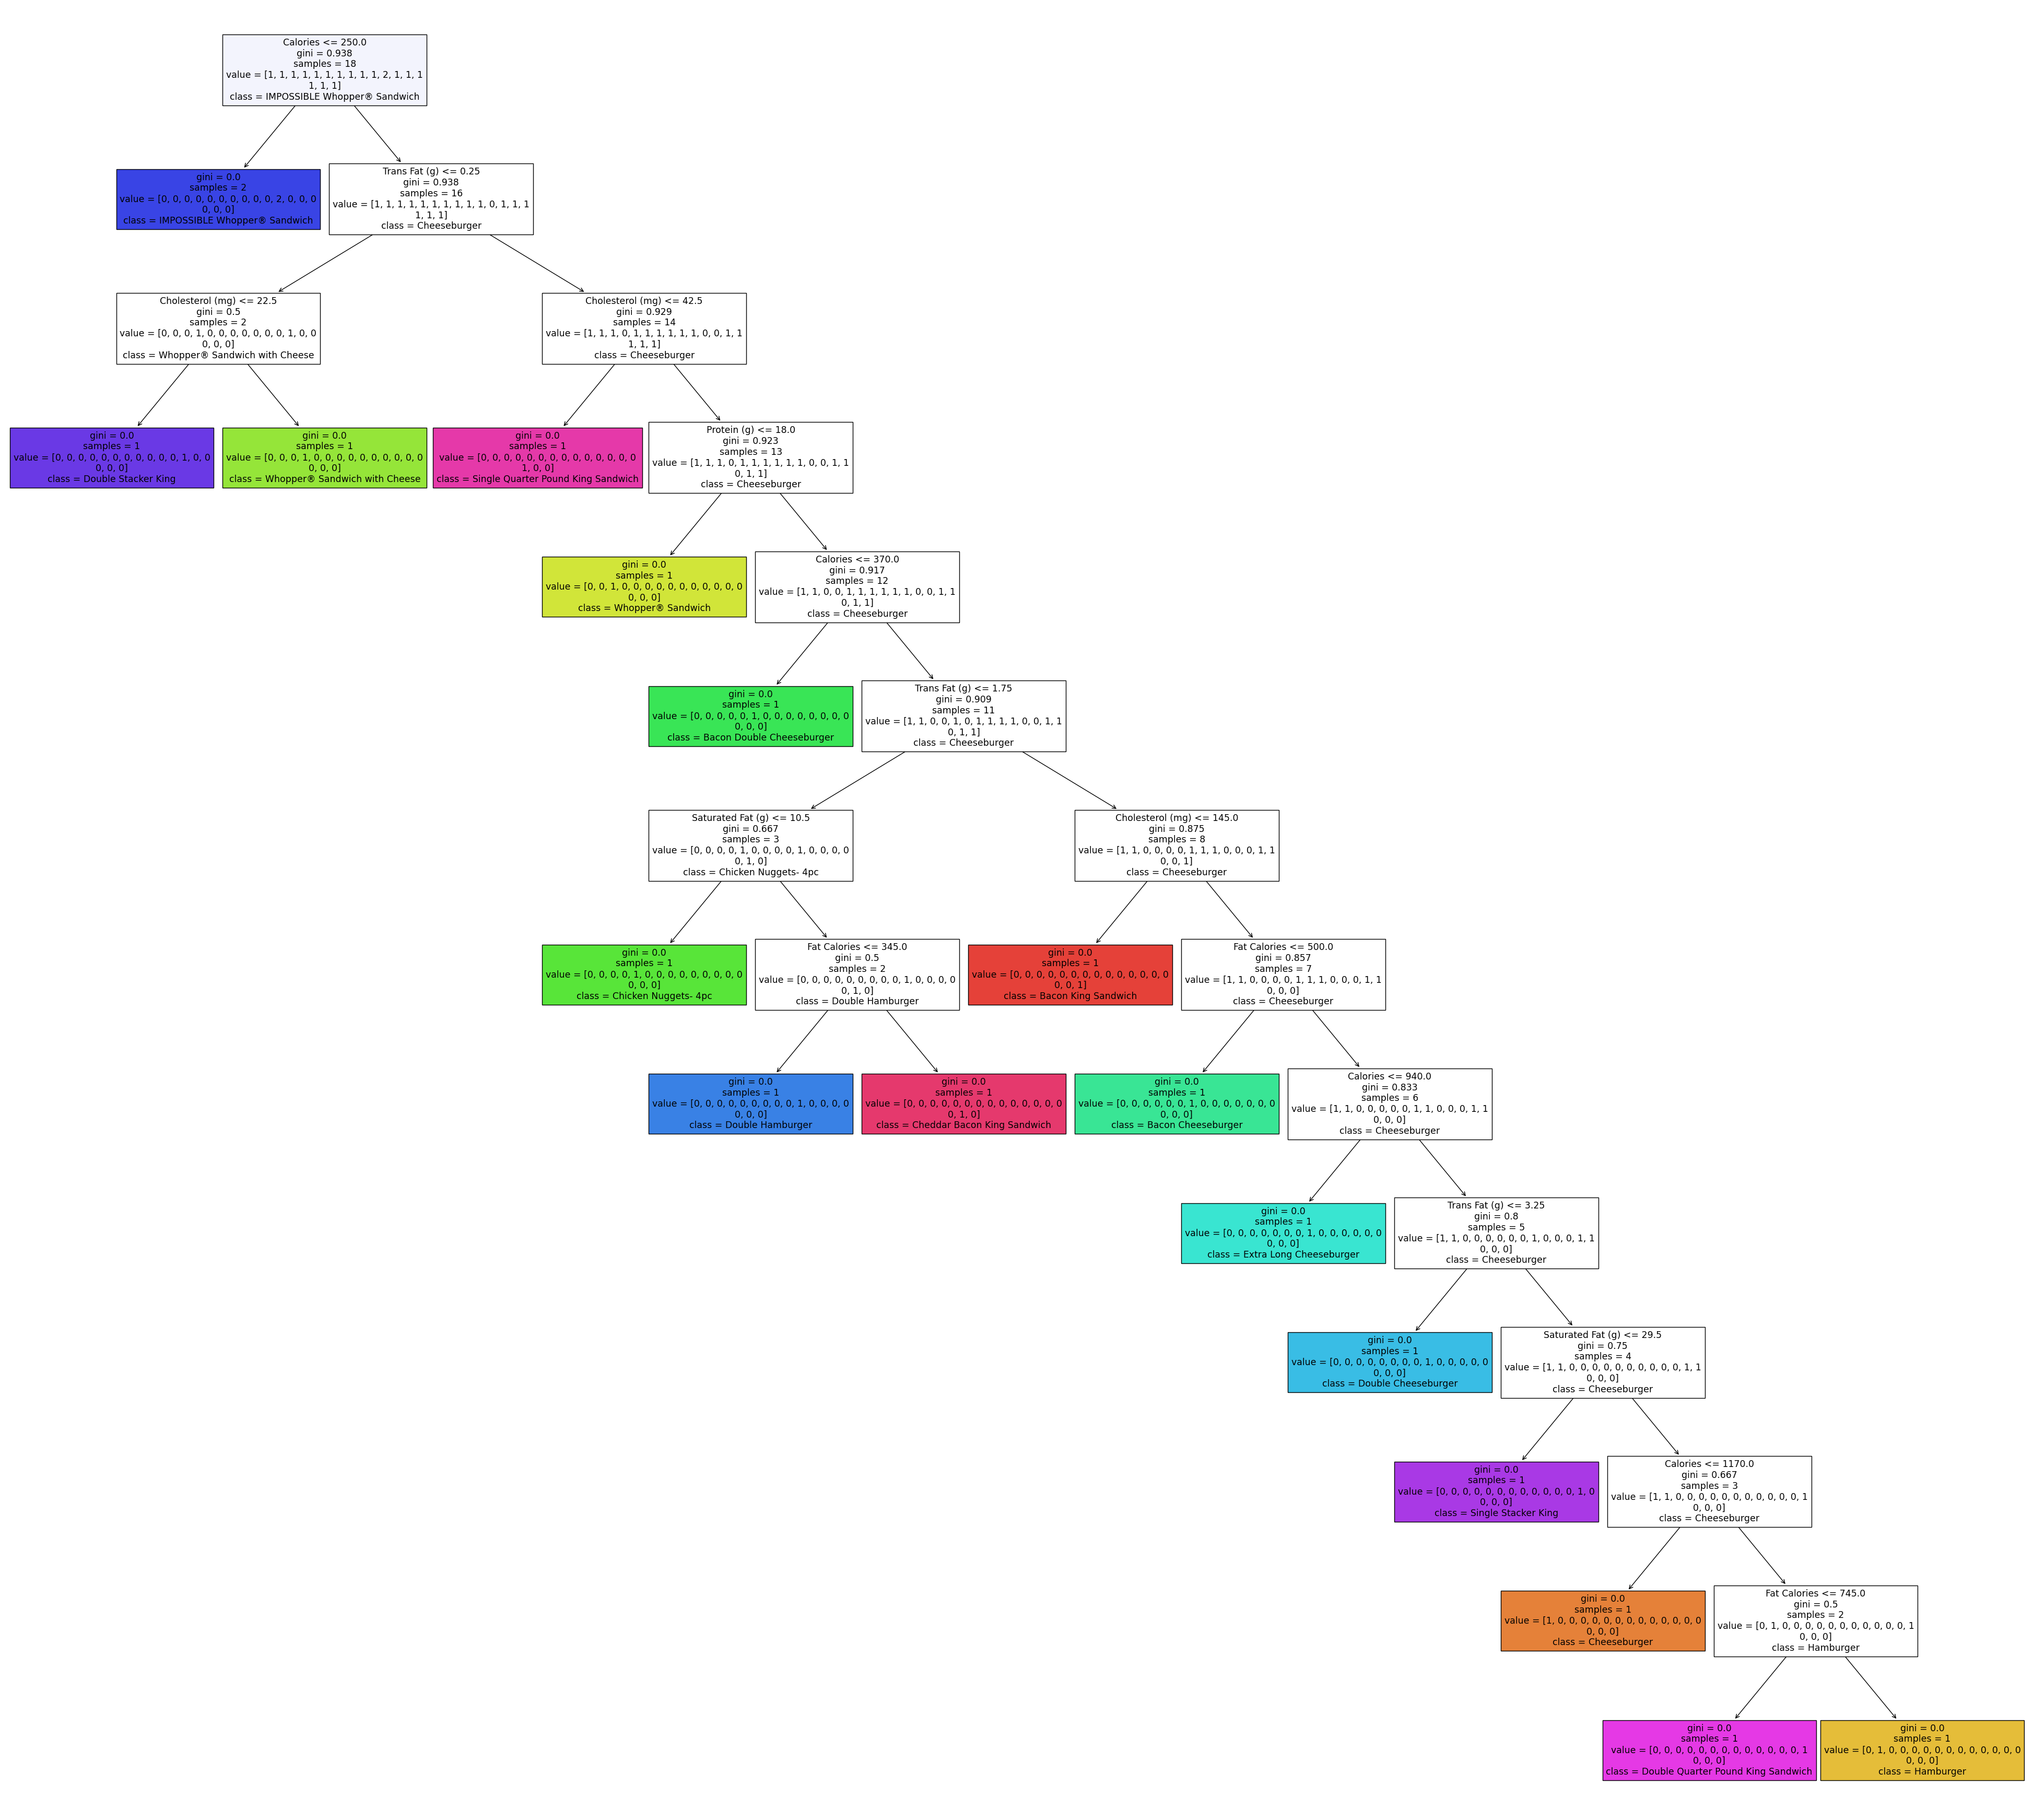

In [66]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel, 
                   feature_names=list(X.columns),  
                   class_names=Y.value_counts().index,
                   filled=True)

In [67]:
fig.savefig("burger_decision_tree.png")

### Interpretation
#### The decision tree helps pick Burger King menu items based on their nutrition, such as calories, fat, cholesterol, and protein, making it easier for customers to choose options that fit their dietary needs.
### Recommendations:
- **Moderate-Calorie, Moderate-Protein:** **Whopper JR.** and **Cheeseburger** offer a balance of calories and protein without being too heavy, perfect for a satisfying yet manageable meal.

- **High-Calorie, High-Protein:** For a heavy meal, go for the **Double Hamburger** **Double Stacker**, which have high protein and calories. 
- **Lower-Fat , Low Calories: The Impossible whopper sandwich** is a lighter choice, with under 250 calories, for those wanting a simple, lower-fat option. 